In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import itertools
%matplotlib inline

Take the following table

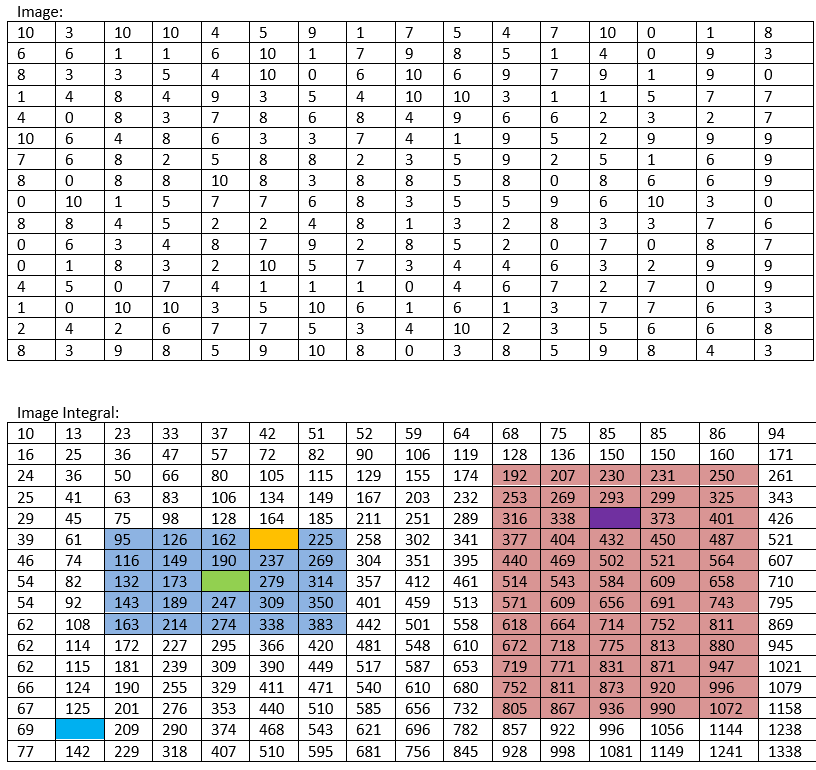

<table align="left">
    <tr>
        <th>Cell</th>
        <th style="align: center">Logic</th>
        <th>Integral Image Value</th>
    </tr>
    <tr>
        <td style="background-color:#42CEEA">Blue</td>
        <td>
            <span>4+5+1+6+8+10+6+6+4+3+6+3</span> <br/>
            <span>2+1+4+8+8+7+10+4+1+8+6+10</span>
        </td>
        <td style="text-align: center">131</td>
    </tr>
    <tr>
        <td style="background-color:#92D050">Green</td>
        <td>
            <span>10+5+6+7+9+4+6+4</span> <br/>
            <span>8+2+2+3+4+5+1+10</span> <br/>
            <span>8+8+4+8+8+3+1+10</span> <br/>
            <span>0+6+6+0+4+3+6+3</span> <br/>
            <span>8+7+10+4+1+8+6+10</span>
        </td>
        <td style="text-align: center">224</td>
    </tr>
    <tr>
        <td style="background-color:#FFC000">Orange</td>
        <td>
            <span>3+8+3+10+10+5</span> <br/>
            <span>6+7+9+4+6+4</span> <br/>
            <span>8+3+4+5+1+10</span> <br/>
            <span>4+8+8+3+1+10</span> <br/>
            <span>6+0+4+3+6+3</span> <br/>
            <span>10+4+1+8+6+10</span>
        </td>
        <td style="text-align: center">201</td>
    </tr>
    <tr>
        <td style="background-color:#7030A0">Purple</td>
        <td>
            <span>1+9+4+10</span> <br/>
            <span>1+7+1+7</span> <br/>
            <span>3+9+5+4</span> <br/>
            <span>10+6+8+5</span> <br/>
            <span>10+10+9+7</span> <br/>
            <span>4+6+7+1</span> <br/>
            <span>5+0+1+9</span> <br/>
            <span>3+10+10+5</span> <br/>
            <span>9+4+6+4</span> <br/>
            <span>4+5+1+10</span> <br/>
            <span>8+3+1+10</span> <br/>
            <span>4+3+6+3</span> <br/>
            <span>1+8+6+10</span> <br/>
        </td>
        <td style="text-align: center">293</td>
    </tr>
</table>
    

<h4>Image Areas to Compute:</h4>
<table align="left">
    <tr>
        <td><b>Area</b></td>
        <td><b>Area-sum- Show your calculation</b></td>
    </tr>
    <tr>
        <td><b>Red</b></td>
        <td>1072-160-732+119=<b>299</b></td>
    </tr>
    <tr>
        <td><b>Blue</b></td>
        <td>383-185-108+45=<b>135</b></td>
    </tr>
</table>


<h5>Generate the integral image for the following image data:  </h5>

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = np.array([[12,12,136,136,136,136,0,0], 
                [12,12,136,136,136,136,0,0],
                [12,12,12,12,0,0,0,0],
                [100,100,12,12,0,0,0,0], 
                [100,100,100,100,48,48,48,48],
                [100,100,100,100,48,48,48,48],
                [100,100,100,100,100,100,48,48],
                [100,100,100,100,100,100,48,48]],dtype=np.uint8)

print (img)

[[ 12  12 136 136 136 136   0   0]
 [ 12  12 136 136 136 136   0   0]
 [ 12  12  12  12   0   0   0   0]
 [100 100  12  12   0   0   0   0]
 [100 100 100 100  48  48  48  48]
 [100 100 100 100  48  48  48  48]
 [100 100 100 100 100 100  48  48]
 [100 100 100 100 100 100  48  48]]


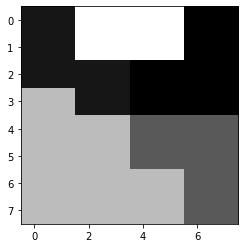

In [5]:
plt.imshow(img, cmap='gray')

[[  12   24  160  296  432  568  568  568]
 [  24   48  320  592  864 1136 1136 1136]
 [  36   72  356  640  912 1184 1184 1184]
 [ 136  272  568  864 1136 1408 1408 1408]
 [ 236  472  868 1264 1584 1904 1952 2000]
 [ 336  672 1168 1664 2032 2400 2496 2592]
 [ 436  872 1468 2064 2532 3000 3144 3288]
 [ 536 1072 1768 2464 3032 3600 3792 3984]]


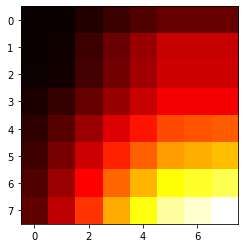

In [8]:
total = 0
img_integral = cv2.integral(img, total, -1)[1:,1:]
print(img_integral)
plt.imshow(img_integral, cmap='hot')


<h5>In Python, given any two lists that defined the rectangles of the minimum and maximum corners: </h5>

In [12]:
# Defining Functions

# a rect parameter is given as [(LL, UR)] or [(minX,minY),(maxX,maxY)]
def iou(A, B):
    rectA = list(itertools.chain(*A))  # will need to import itertools
    rectB = list(itertools.chain(*B))
    
    # Find the overlap coordinates
    xA = max(rectA[0], rectB[0])
    yA = max(rectA[1], rectB[1])
    xB = min(rectA[2], rectB[2])
    yB = min(rectA[3], rectB[3])
    # compute the area of intersection rectangle
    overlap_Area = max(0, xB - xA) * max(0, yB - yA)
    
    # compute the area of both the rectangles
    rectA_Area = (rectA[2] - rectA[0]) * (rectA[3] - rectA[1])
    rectB_Area = (rectB[2] - rectB[0]) * (rectB[3] - rectB[1])
    iou = overlap_Area / float(rectA_Area + rectB_Area - overlap_Area)
    return iou

In [13]:
ground_truth = [(3,6),(10,10)]
prediction = [(7,-1),(15,7)]


score = iou(ground_truth, prediction)
print(score)

0.033707865168539325


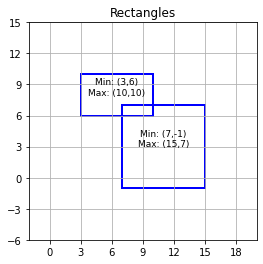

In [19]:
from matplotlib.ticker import MaxNLocator
import itertools

def draw_rectangles(rectangleDataList):
    padding = 5
    maxX = max([max_x for (min_x,min_y,max_x,max_y) in rectangleDataList]) + padding
    minX = min([min_x for (min_x,min_y,max_x,max_y) in rectangleDataList]) - padding
    maxY = max([max_y for (min_x,min_y,max_x,max_y) in rectangleDataList]) + padding
    minY = min([min_y for (min_x,min_y,max_x,max_y) in rectangleDataList]) - padding

    # this plots all of the rectangles on the same graph
    fig, ax = plt.subplots()
    plt.title('Rectangles')
    ax.set_aspect(1) #normalizes the graph
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    #the x and y limits for the graph are set by the largest x and y values generated and are restricted by radii
    plt.xlim(minX , maxX )
    plt.ylim(minY , maxY )
    plt.grid(True, which='both')

    for rectangle in rectangleDataList:
        min_x,min_y,max_x,max_y = rectangle
        width = max_x - min_x
        height = max_y - min_y

        # Plot library uses min left as the point
        pt_x = min_x
        pt_y = min_y

        # For annotation
        center_x = min_x + width/2.0
        center_y = min_y + height/2.0

        # Place the rectangle
        rectangleObj = plt.Rectangle(xy=(pt_x, pt_y), width=width, height=height, color='b', fill=False, linewidth=2)
        ax.add_artist(rectangleObj)
        annotate_string = 'Min: (' + str(min_x)+','+str(min_y)+')\n'+'Max: ('+str(max_x)+','+str(max_y) + ')'
        label = ax.annotate(annotate_string, xy=(center_x, center_y), fontsize=9, ha="center")

    plt.show()

draw_rectangles([list(itertools.chain(*ground_truth)), list(itertools.chain(*prediction))])